# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading in dataset
df = pd.read_csv('../data/raw/European_Ski_Resorts.csv')

In [3]:
# first 5 rows
df.head()

,Unnamed: 0,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
0,1,Alpendorf (Ski amedé),Austria,1980,740,52,30,81,4,115,Yes,No,22,16,11,49,75398,600
1,2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640,1710,47,100,77,33,210,Yes,Yes,37,28,7,72,99017,1032
2,3,Oberau (Wildschönau),Austria,1130,900,30,1,0,1,2,No,No,2,0,0,2,1932,0
3,4,Dachstein West,Austria,1620,780,42,15,33,3,51,Yes,Yes,25,8,3,36,32938,163
4,5,Rosa Khutor,Southern Russia,2320,940,22,30,26,21,77,Yes,No,6,11,10,27,49228,450


In [4]:
# stats of dataset
df.describe()

,Unnamed: 0,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,188.500000,2051.688830,1055.098404,40.779255,35.869681,38.348404,11.776596,86.257979,13.662234,9.340426,3.954787,26.957447,34727.244681,218.361702
std,108.686092,776.719908,423.604310,12.474259,53.719832,49.691136,17.785780,113.740218,14.438661,12.595282,6.565411,31.038957,45955.042689,406.903529
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.750000,1550.000000,779.250000,34.000000,8.000000,9.000000,2.000000,25.000000,5.000000,2.000000,0.000000,10.000000,10642.500000,0.000000
50%,188.500000,2104.000000,1050.000000,42.000000,19.000000,22.000000,5.000000,48.000000,9.000000,5.000000,2.000000,17.000000,19031.500000,54.000000
75%,282.250000,2567.500000,1350.000000,49.000000,40.000000,42.250000,13.000000,100.000000,17.000000,10.000000,5.000000,29.250000,36555.500000,252.000000
max,376.000000,3899.000000,2180.000000,81.000000,312.000000,239.000000,103.000000,600.000000,89.000000,74.000000,40.000000,174.000000,252280.000000,2383.000000


In [5]:
df.shape

(376, 18)

In [6]:
# countries

country_counts = df['Country'].value_counts()
country_counts

Country
Austria                   89
France                    83
Switzerland               61
Italy                     44
Germany                   24
Norway                    10
Spain                      8
Denmark                    8
Sweden                     6
Andorra                    5
Slovakia                   5
Slovenia                   4
United Kingdom             4
Bulgaria                   4
Southern Russia            4
Finland                    3
Poland                     2
Czech Republic             2
Romania                    2
Lithuania                  1
Liechtenstein              1
Serbia                     1
Greece                     1
Siberia                    1
Bosnia and Herzegovina     1
Ukraine                    1
Netherlands                1
Name: count, dtype: int64

In [7]:
# finding the amount of slopes each country has
slopes = df[df['TotalSlope'] > 0]
slopes_by_country = slopes.groupby('Country')['Resort'].count()
slopes_by_country

Country
Andorra                    5
Austria                   89
Bosnia and Herzegovina     1
Bulgaria                   4
Czech Republic             2
Denmark                    1
Finland                    3
France                    82
Germany                   23
Greece                     1
Italy                     44
Liechtenstein              1
Lithuania                  1
Netherlands                1
Norway                    10
Poland                     2
Romania                    2
Serbia                     1
Slovakia                   5
Slovenia                   4
Southern Russia            4
Spain                      8
Sweden                     6
Switzerland               60
Ukraine                    1
United Kingdom             4
Name: Resort, dtype: int64

In [8]:
# day pass for adults by resorts
day_pass_resorts = df[['Resort','DayPassPriceAdult']]
day_pass_resorts

,Resort,DayPassPriceAdult
0,Alpendorf (Ski amedé),52
1,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,47
2,Oberau (Wildschönau),30
3,Dachstein West,42
4,Rosa Khutor,22
...,...,...
371,Montgenèvre (Via Lattea),48
372,Sauze d’Oulx (Via Lattea),48
373,Gressoney - La-Trinite (Monterosa Ski),43
374,Champoluc (Monterosa Ski),43


In [9]:
# the highest and cheapest Day Pass Price 

highest_price = df['DayPassPriceAdult'].max()
cheapest_price = df['DayPassPriceAdult'].min()

highest_price_resort = df.loc[df['DayPassPriceAdult'].idxmax(), 'Resort']
highest_price_country = df.loc[df['DayPassPriceAdult'].idxmax(), 'Country']

cheapest_price_resort = df.loc[df['DayPassPriceAdult'].idxmin(), 'Resort']
cheapest_price_country = df.loc[df['DayPassPriceAdult'].idxmin(), 'Country']

print(f"Highest Day Pass Price for an Adult: {highest_price} at {highest_price_resort} in {highest_price_country}.")
print(f"Cheapest Day Pass Price for an Adult: {cheapest_price} at {cheapest_price_resort} in {cheapest_price_country}.")

Highest Day Pass Price for an Adult: 81 at Cervinia in Switzerland.
Cheapest Day Pass Price for an Adult: 0 at Pragelato in Italy.


In [10]:
# cheapest resorts of day
cheapest_resorts = df[df['DayPassPriceAdult'] == cheapest_price]
cheapest_resorts

,Unnamed: 0,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
123,124,Pragelato,Italy,2700,1335,0,14,32,4,50,No,No,4,1,0,5,3660,0
131,132,Sheregesh-Kemerovo,Siberia,1270,670,0,0,0,0,0,No,No,3,5,4,12,19919,0
162,163,Alpika Service,Southern Russia,2228,535,0,10,10,5,25,No,No,1,1,7,9,18120,0
217,218,Indoor ski area Skidome Denmark – Randers (pla...,Denmark,120,10,0,1,1,1,3,no report,No,0,0,0,0,0,0
218,219,Dry slopes Indoorski – Rødovre,Denmark,53,50,0,0,0,0,0,no report,No,0,0,0,0,0,0
219,220,Dry slopes Ski Arena – Aarhus,Denmark,23,20,0,0,0,0,0,no report,No,0,0,0,0,0,0
220,221,Copenhagen (planned),Denmark,0,0,0,0,0,0,0,no report,No,0,0,0,0,0,0
255,256,Puigmal,France,2700,1830,0,9,15,7,32,No,No,11,2,0,13,11865,0


In [11]:
df[df['DayPassPriceAdult'] == highest_price]

,Unnamed: 0,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
295,296,Cervinia,Switzerland,3899,1562,81,75,220,27,322,Yes,No,21,22,20,63,93464,1060
335,336,Zermatt - Matterhorn,Switzerland,3899,1562,81,75,220,27,322,Yes,No,21,22,20,63,93464,1060


## Univariate Analysis

<Axes: xlabel='HighestPoint', ylabel='Count'>

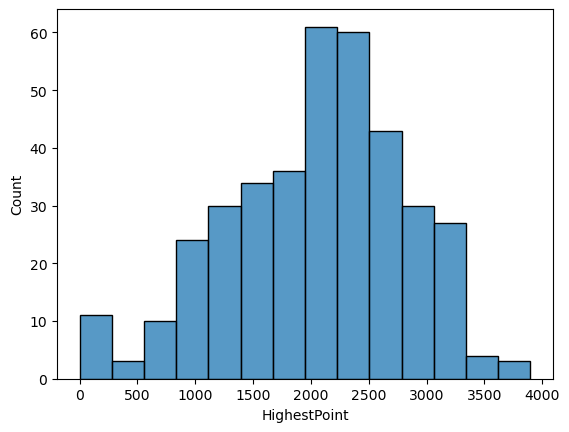

In [14]:
sns.histplot(data=df, x="HighestPoint")

<Axes: xlabel='LowestPoint', ylabel='Count'>

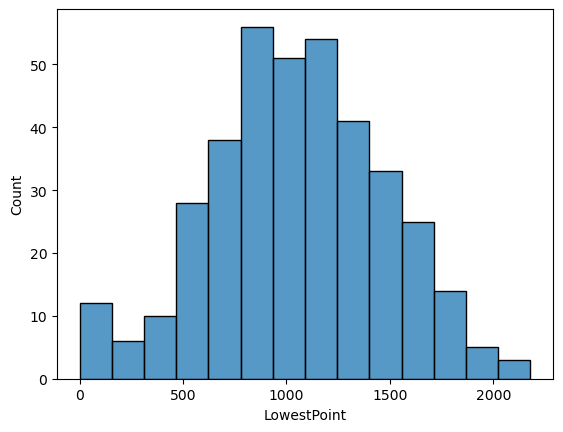

In [15]:
sns.histplot(data=df, x="LowestPoint")

<Axes: xlabel='DayPassPriceAdult', ylabel='Count'>

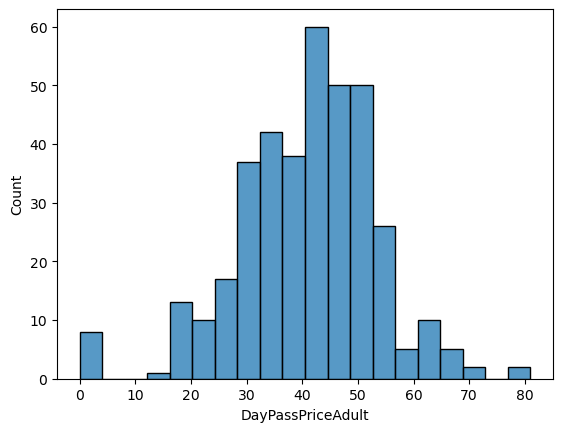

In [16]:
sns.histplot(data=df, x="DayPassPriceAdult")

<Axes: xlabel='BeginnerSlope', ylabel='Count'>

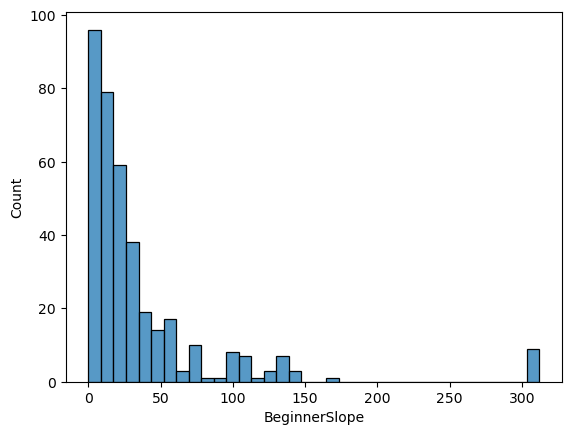

In [17]:
sns.histplot(data=df, x="BeginnerSlope")

<Axes: xlabel='IntermediateSlope', ylabel='Count'>

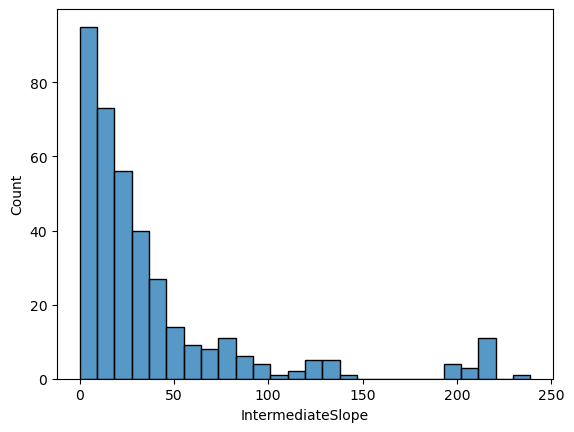

In [18]:
sns.histplot(data=df, x="IntermediateSlope")

<Axes: xlabel='DifficultSlope', ylabel='Count'>

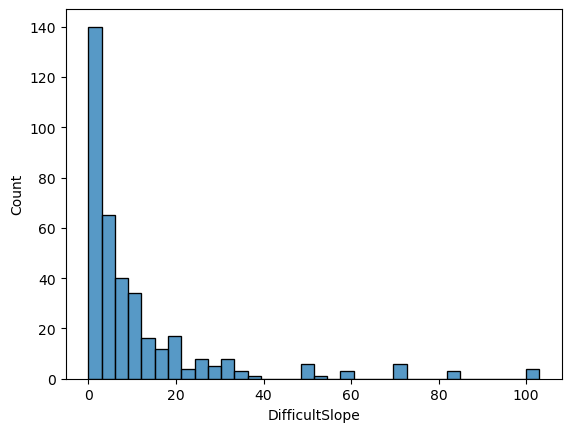

In [19]:
sns.histplot(data=df, x="DifficultSlope")

<Axes: xlabel='TotalSlope', ylabel='Count'>

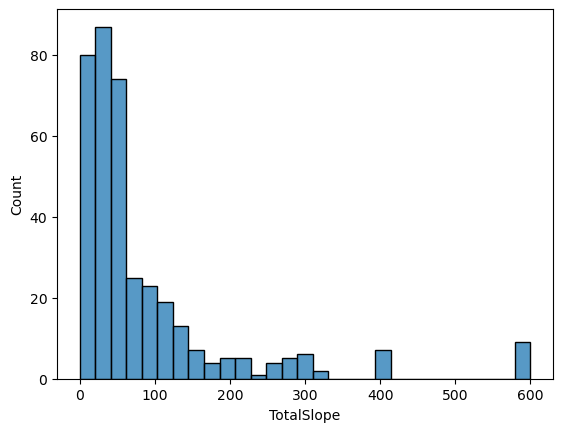

In [20]:
sns.histplot(data=df, x="TotalSlope")

<Axes: xlabel='SurfaceLifts', ylabel='Count'>

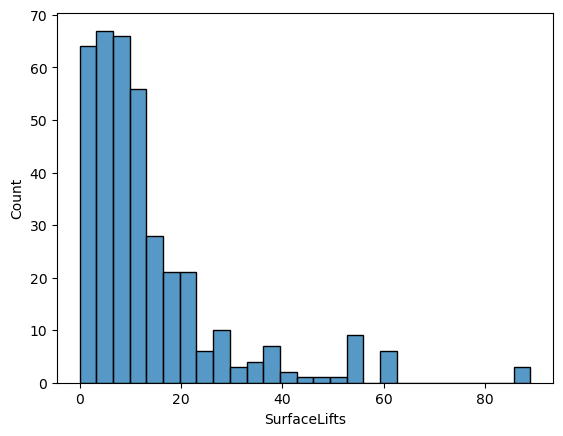

In [21]:
sns.histplot(data=df, x="SurfaceLifts")

<Axes: xlabel='ChairLifts', ylabel='Count'>

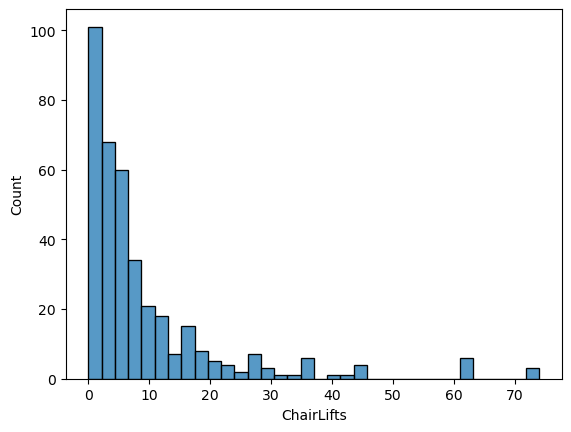

In [22]:
sns.histplot(data=df, x="ChairLifts")

<Axes: xlabel='GondolaLifts', ylabel='Count'>

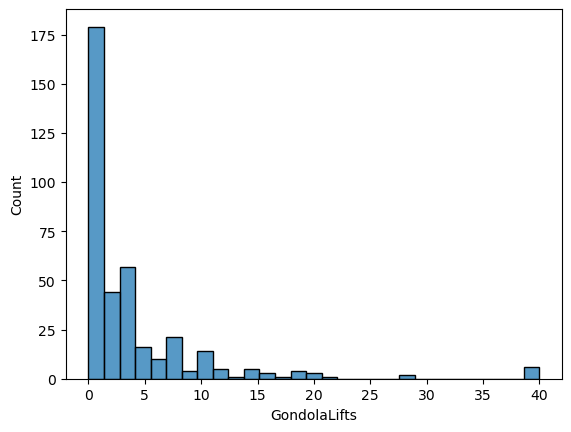

In [23]:
sns.histplot(data=df, x="GondolaLifts")

<Axes: xlabel='TotalLifts', ylabel='Count'>

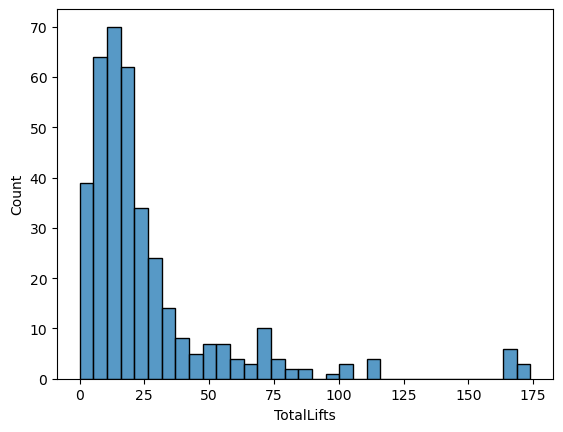

In [24]:
sns.histplot(data=df, x="TotalLifts")

<Axes: xlabel='LiftCapacity', ylabel='Count'>

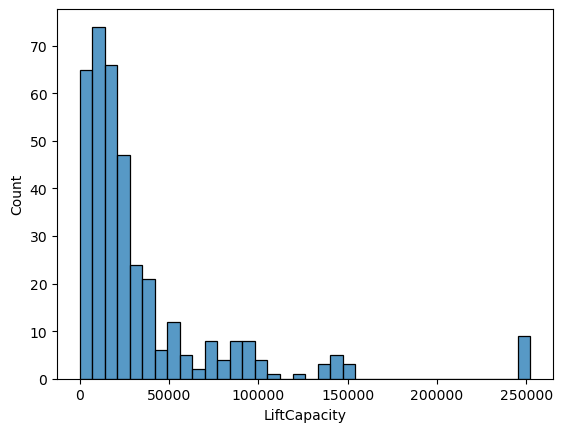

In [25]:
sns.histplot(data=df, x="LiftCapacity")

<Axes: xlabel='SnowCannons', ylabel='Count'>

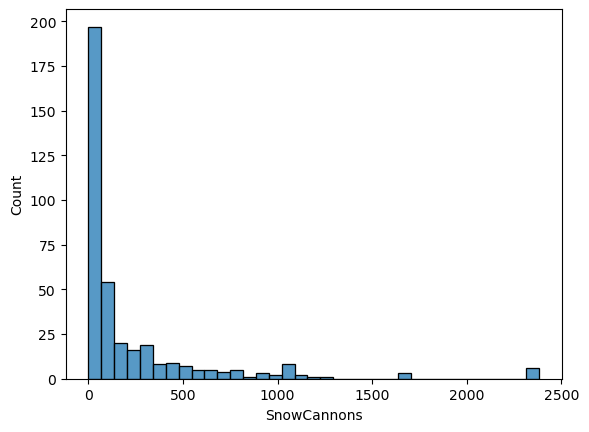

In [26]:
sns.histplot(data=df, x="SnowCannons")

In [27]:
snowpark_counts = df["Snowparks"].value_counts()

<Axes: xlabel='Snowparks'>

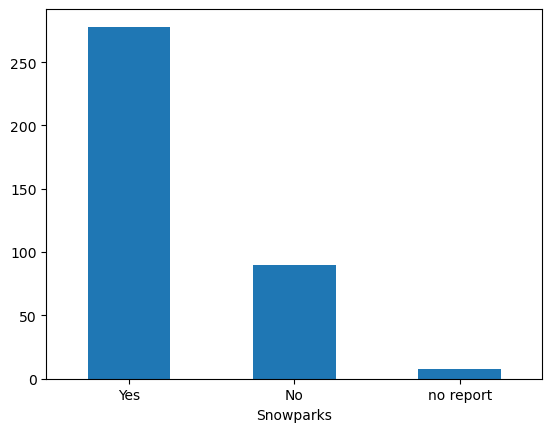

In [29]:
snowpark_counts.plot.bar(rot=0)

In [30]:
night_counts = df["NightSki"].value_counts()

<Axes: xlabel='NightSki'>

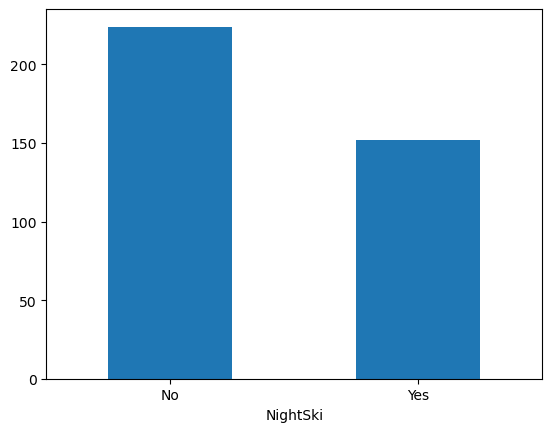

In [32]:
night_counts.plot.bar(rot=0)

In [33]:
loc_counts = df["Country"].value_counts()

<Axes: ylabel='Country'>

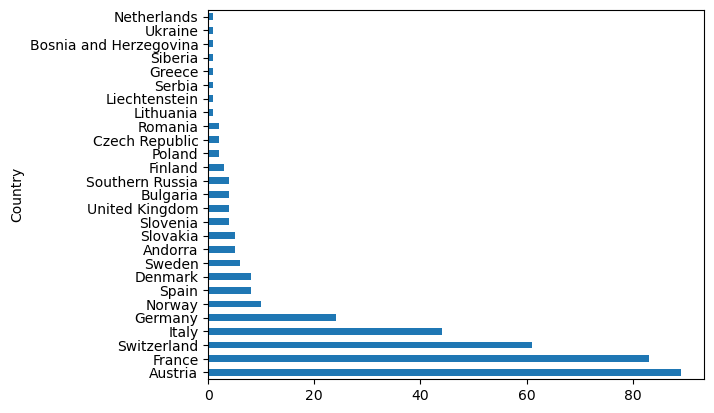

In [34]:
loc_counts.plot.barh()

## Bivariate Analysis

<Axes: xlabel='Snowparks', ylabel='DayPassPriceAdult'>

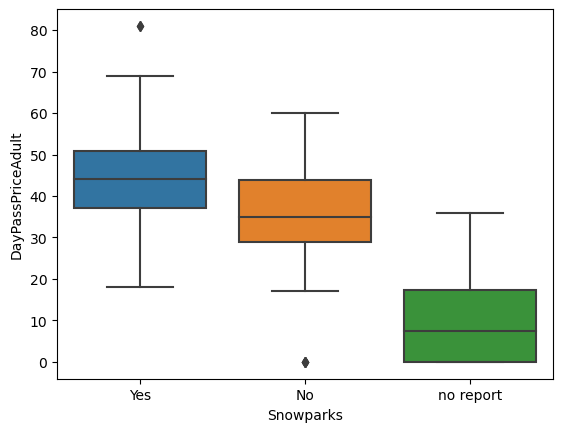

In [38]:
sns.boxplot(data=df, x="Snowparks", y="DayPassPriceAdult")

<Axes: xlabel='NightSki', ylabel='DayPassPriceAdult'>

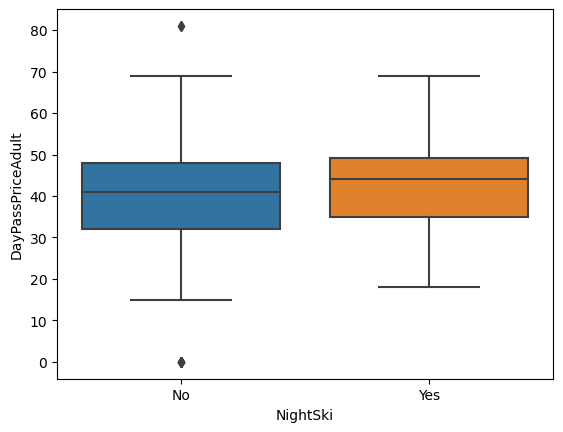

In [39]:
sns.boxplot(data=df, x="NightSki", y="DayPassPriceAdult")

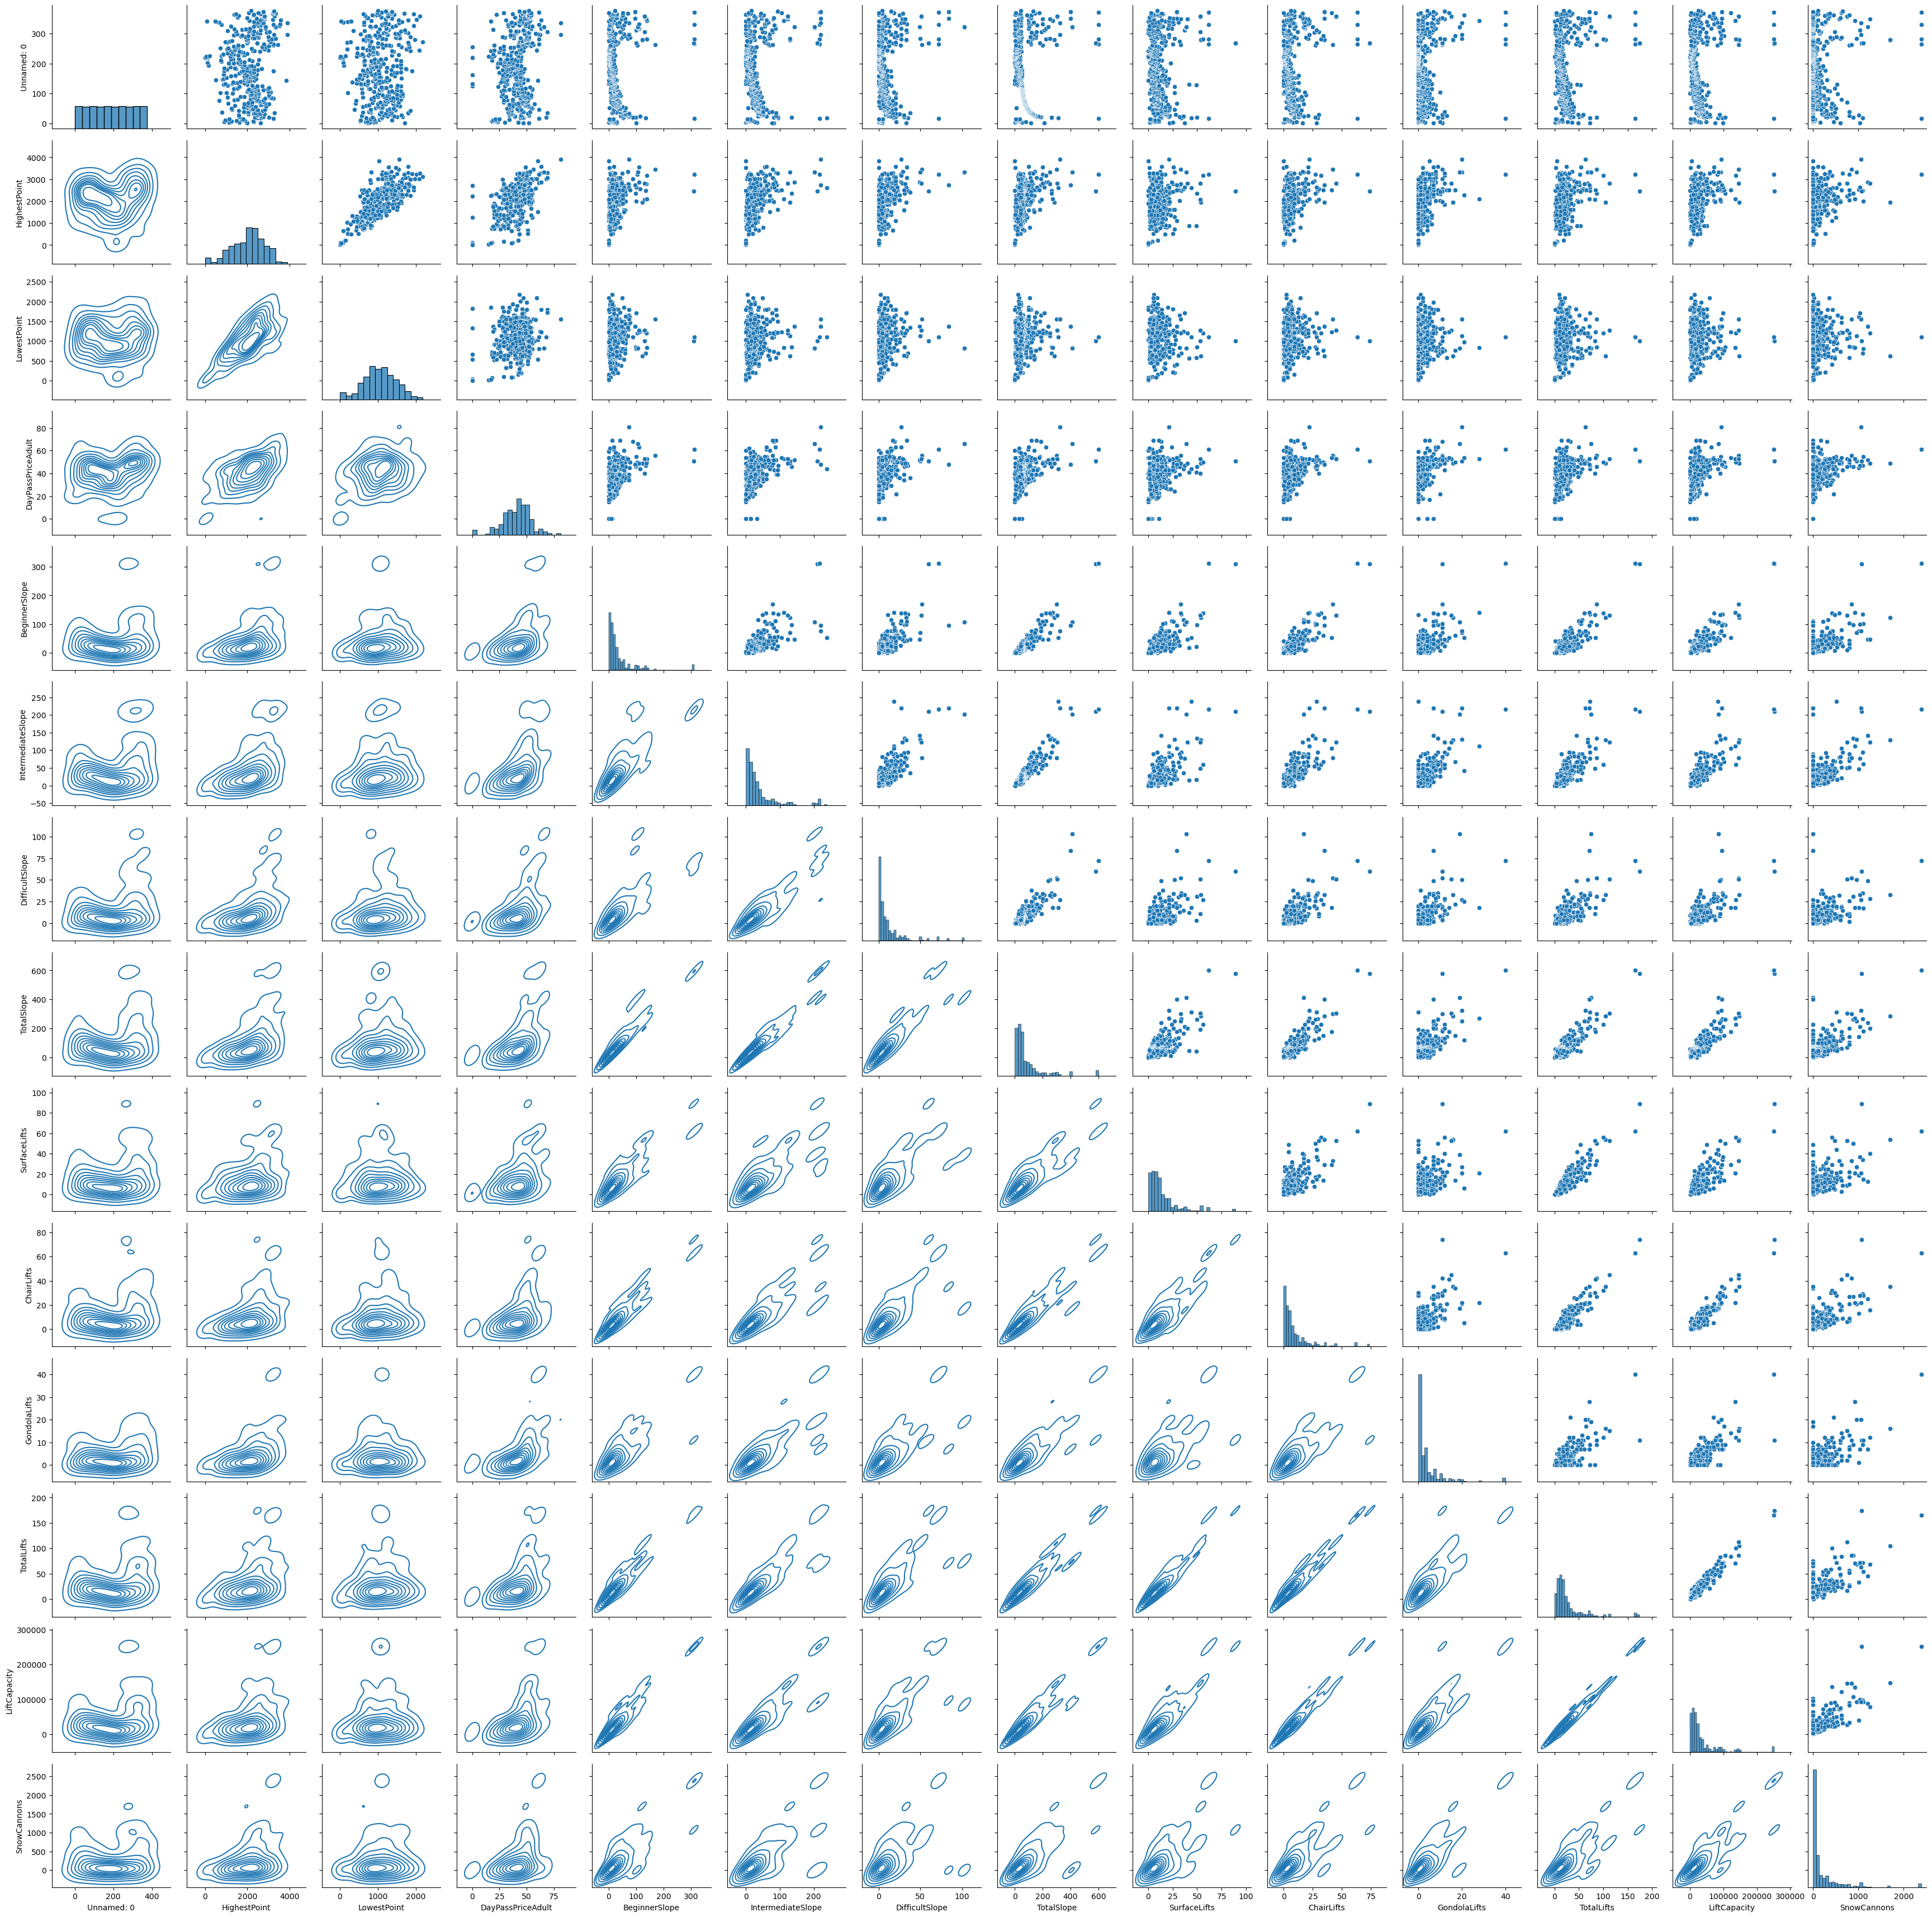

In [40]:
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)